In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# data uploading
data= pd.read_csv(r"C:\Users\hizan\Desktop\webmd\webmd.csv")
data.head()


,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [5]:
data.shape

(362806, 12)

In [6]:
data.duplicated().sum()

943

In [7]:
data.isnull().sum()

Age               0
Condition         0
Date              0
Drug              0
DrugId            0
EaseofUse         0
Effectiveness     0
Reviews          37
Satisfaction      0
Sex               0
Sides             0
UsefulCount       0
dtype: int64

In [8]:
data.dtypes

Age              object
Condition        object
Date             object
Drug             object
DrugId            int64
EaseofUse         int64
Effectiveness     int64
Reviews          object
Satisfaction      int64
Sex              object
Sides            object
UsefulCount       int64
dtype: object

In [9]:
# unique features in each column
data.nunique()

Age                  12
Condition          1806
Date               4524
Drug               7093
DrugId             6572
EaseofUse             7
Effectiveness         7
Reviews          250167
Satisfaction          7
Sex                   3
Sides              1651
UsefulCount         148
dtype: int64

In [10]:
data.describe(include='object').T

,count,unique,top,freq
Age,362806,12,45-54,80043
Condition,362806,1806,Other,49765
Date,362806,4524,10/29/2007,404
Drug,362806,7093,cymbalta,4648
Reviews,362769,250167,,41824
Sex,362806,3,Female,238226
Sides,362806,1651,,17460


In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
DrugId,362806.0,36879.370774,52624.412971,1.0,4896.0,9548.0,63522.0,178546.0
EaseofUse,362806.0,4.019829,1.317711,1.0,3.0,5.0,5.0,10.0
Effectiveness,362806.0,3.532061,1.455961,1.0,3.0,4.0,5.0,10.0
Satisfaction,362806.0,3.135408,1.611106,1.0,1.0,3.0,5.0,10.0
UsefulCount,362806.0,6.744916,9.324240,0.0,1.0,4.0,9.0,255.0


In [12]:
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# display the numerical variables
data[numerical_features].head()


Number of numerical variables:  5


,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
0,146724,5,5,5,0
1,146724,5,5,5,1
2,144731,2,3,3,0
3,144731,2,2,1,0
4,144731,1,1,1,1


In [13]:
numeric= data[numerical_features].drop('DrugId',axis=1)

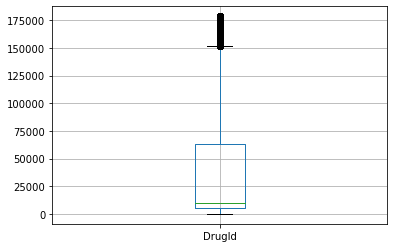

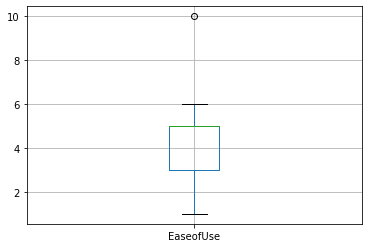

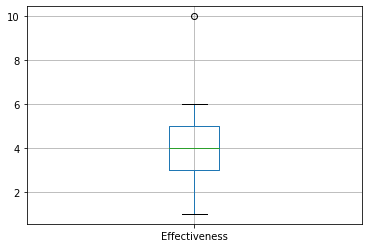

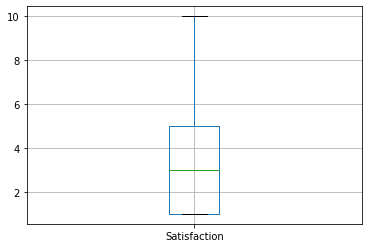

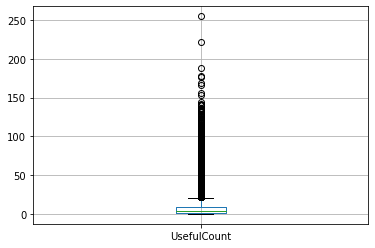

In [14]:
for x in numerical_features:
    data[[x]].boxplot()
    plt.show()

### Handling duplicates

In [15]:
data.drop_duplicates(inplace= True)

In [16]:
data.duplicated().sum()

0

### Handling Missing Values

In [17]:
data['Reviews'].unique()

array(["I'm a retired physician and of all the meds I have tried for my allergies (seasonal and not) - this one is the most effective for me.  When I first began using this drug some years ago - tiredness as a problem but is not currently.",
       'cleared me right up even with my throat hurting it went away after taking the medicine',
       'why did my PTINR go from a normal of 2.5 to over \n100?', ...,
       "As long as I was on chantix, I didn't smoke.  Terrible stomach upset after each dose, constipation, headaches constantly, crazy dreams and mood swings.  I have had to stop taking it and have found other ways to stop smoking.",
       "Started this medication Oct 5th 2008. Haven't smoked for 6 weeks and planning on the full 12 weeks program.  I have had some problems like getting sick after the meds but accually it helps because everytime I see a smoker or smell smoke I get sick, still want one but it offsets it.",
       "One year ago, I tried Chantix and had to stop taking i

Here, Missing values are found in 'Review column' which is not useful for our classification process. hence, we drop the column 'Reviews'

In [18]:
#data.drop('Reviews',axis=1,inplace=True)

here useful count is the no of people who felt the review useful which is not relevant 
so we drop the column useful count

In [19]:
#data.drop('UsefulCount',axis=1, inplace= True)

In [20]:
data.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


### Handling Outliers

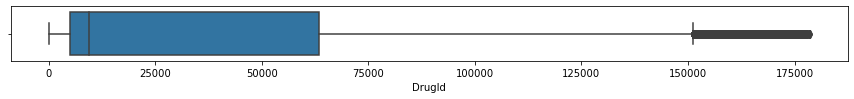

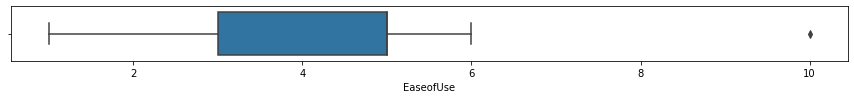

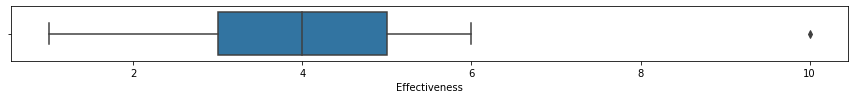

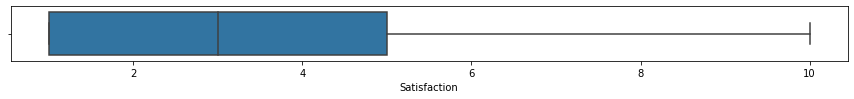

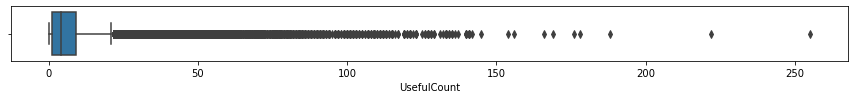

In [21]:
for column in numerical_features:
    plt.figure(figsize=(15,1))
    sns.boxplot(data=data,x=column)

Here, there are outliers only for the column'UsefulCount' which is the no: of users who found the respective review useful and column 'DrugId'. which can of higher number. so outliers here are not handled

In [22]:
data.Sides.value_counts()

                                                                                                                                                    17064
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                       15556
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.    12113
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.              9160
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.           7790
                                                                                                                                                    ...  
Headache ,  nausea , chills, or fever may occur.                            

### Exploratory Data Analysis

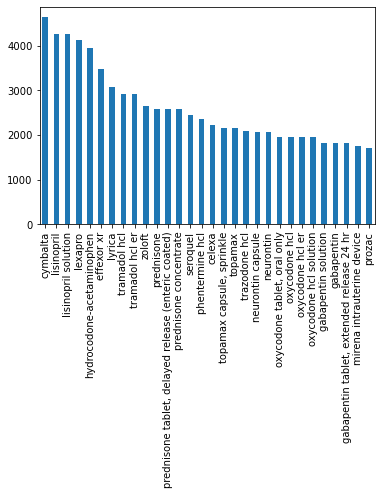

In [23]:
data['Drug'].value_counts().head(30).plot(kind='bar')
plt.show()

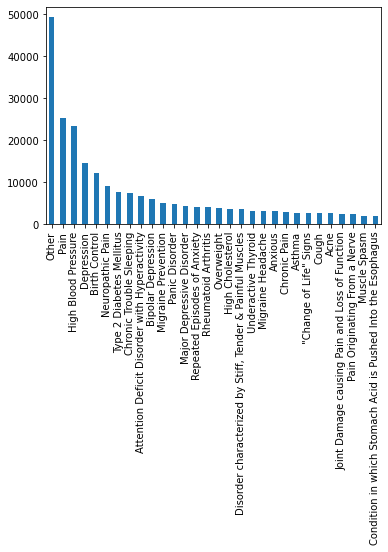

In [24]:
data['Condition'].value_counts().head(30).plot(kind='bar')
plt.show()

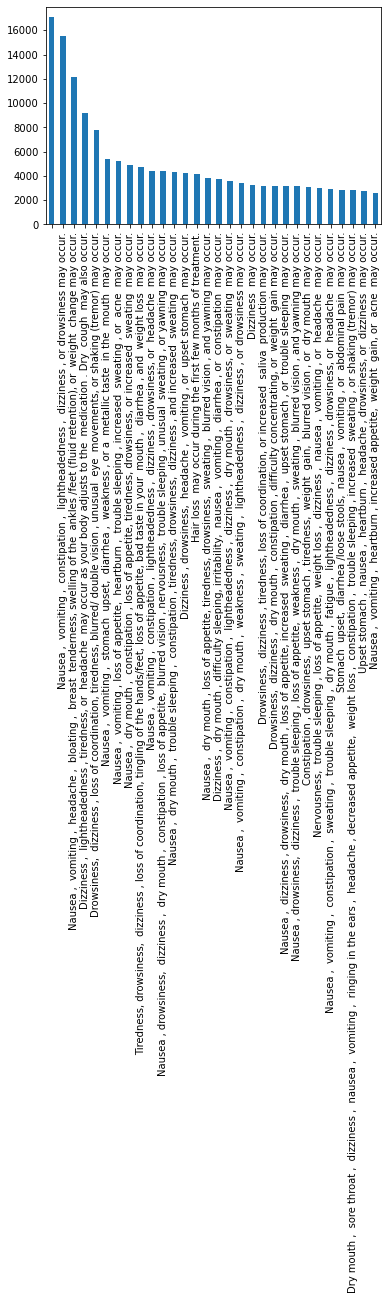

In [25]:
data['Sides'].value_counts().head(30).plot(kind='bar')
plt.show()

<AxesSubplot:>

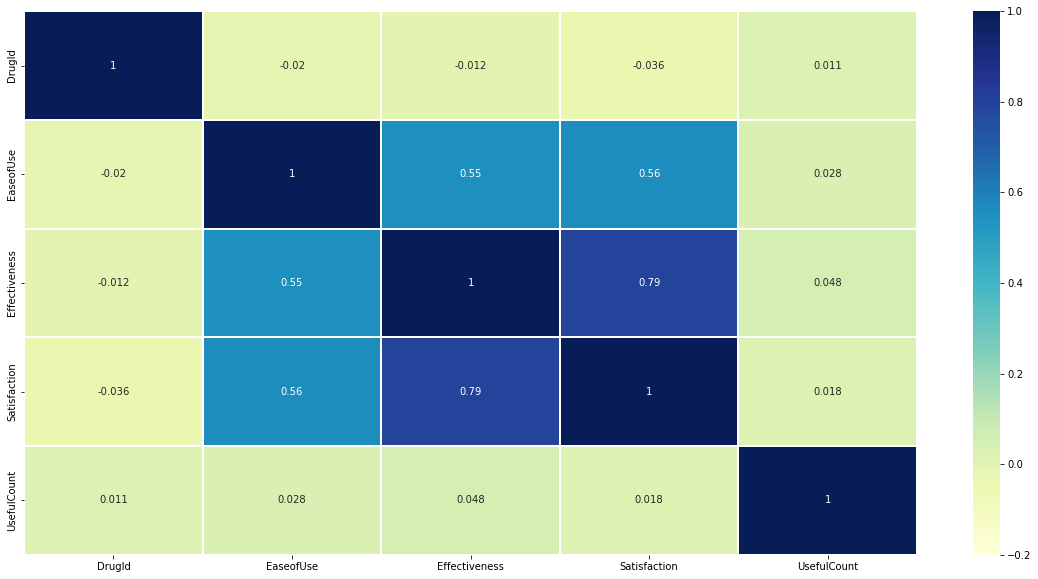

In [26]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmatrix,vmin=-0.2,vmax=1,annot=True,linewidths=0.2,cmap='YlGnBu')

In [27]:
for i in numeric:
    print("Value count of",i)
    print(data[i].value_counts())

Value count of EaseofUse
5     192227
4      74406
3      41171
1      35875
2      18181
6          2
10         1
Name: EaseofUse, dtype: int64
Value count of Effectiveness
5     130036
4      81666
3      60194
1      59254
2      30710
6          2
10         1
Name: Effectiveness, dtype: int64
Value count of Satisfaction
5     111177
1     100701
4      63040
3      51790
2      35152
6          2
10         1
Name: Satisfaction, dtype: int64
Value count of UsefulCount
0      71099
1      46147
2      34670
3      27254
4      22831
       ...  
136        1
178        1
176        1
169        1
95         1
Name: UsefulCount, Length: 148, dtype: int64


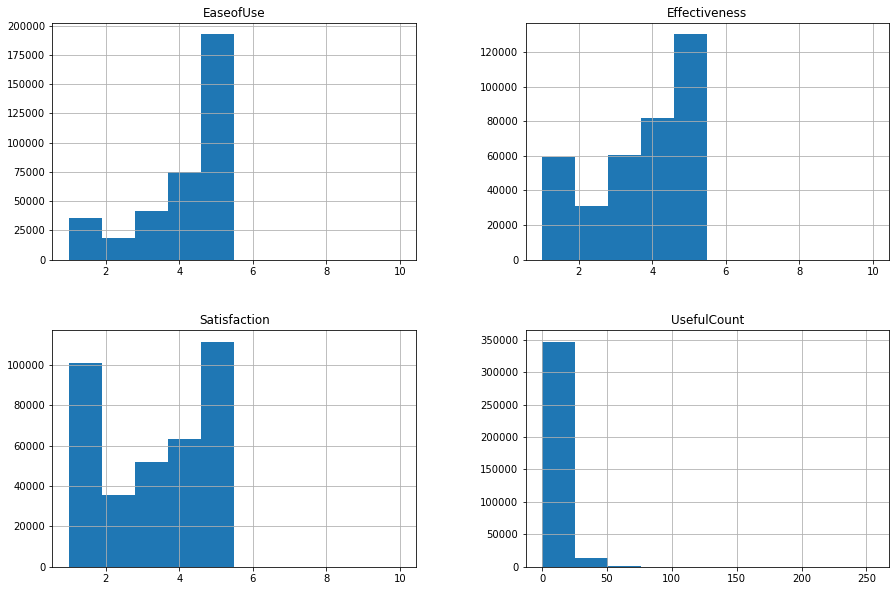

In [28]:
numeric.hist(figsize=(15,10))
plt.show()



sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

effect = dict(data.loc[data.Effectiveness == 10, "Drug"].value_counts())
drugname = list(effect.keys())
drug_effect = list(effect.values())

sns_effect = sns.barplot(x = drugname[0:20], y = drug_effect[0:20])

sns_effect.set_title('drug with 10/10 Effectiveness')
sns_effect.set_ylabel("Number of Ratings")
sns_effect.set_xlabel("Drug Names")
plt.setp(sns_effect.get_xticklabels(), rotation=0);

sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

effect = dict(data.loc[data.Effectiveness >5, "Drug"].value_counts())
drugname = list(effect.keys())
drug_effect = list(effect.values())

sns_effect = sns.barplot(x = drugname[0:20], y = drug_effect[0:20])

sns_effect.set_title('drug with >5 rating onEffectiveness')
sns_effect.set_ylabel("Number of Ratings")
sns_effect.set_xlabel("Drug Names")
plt.setp(sns_effect.get_xticklabels(), rotation=90);

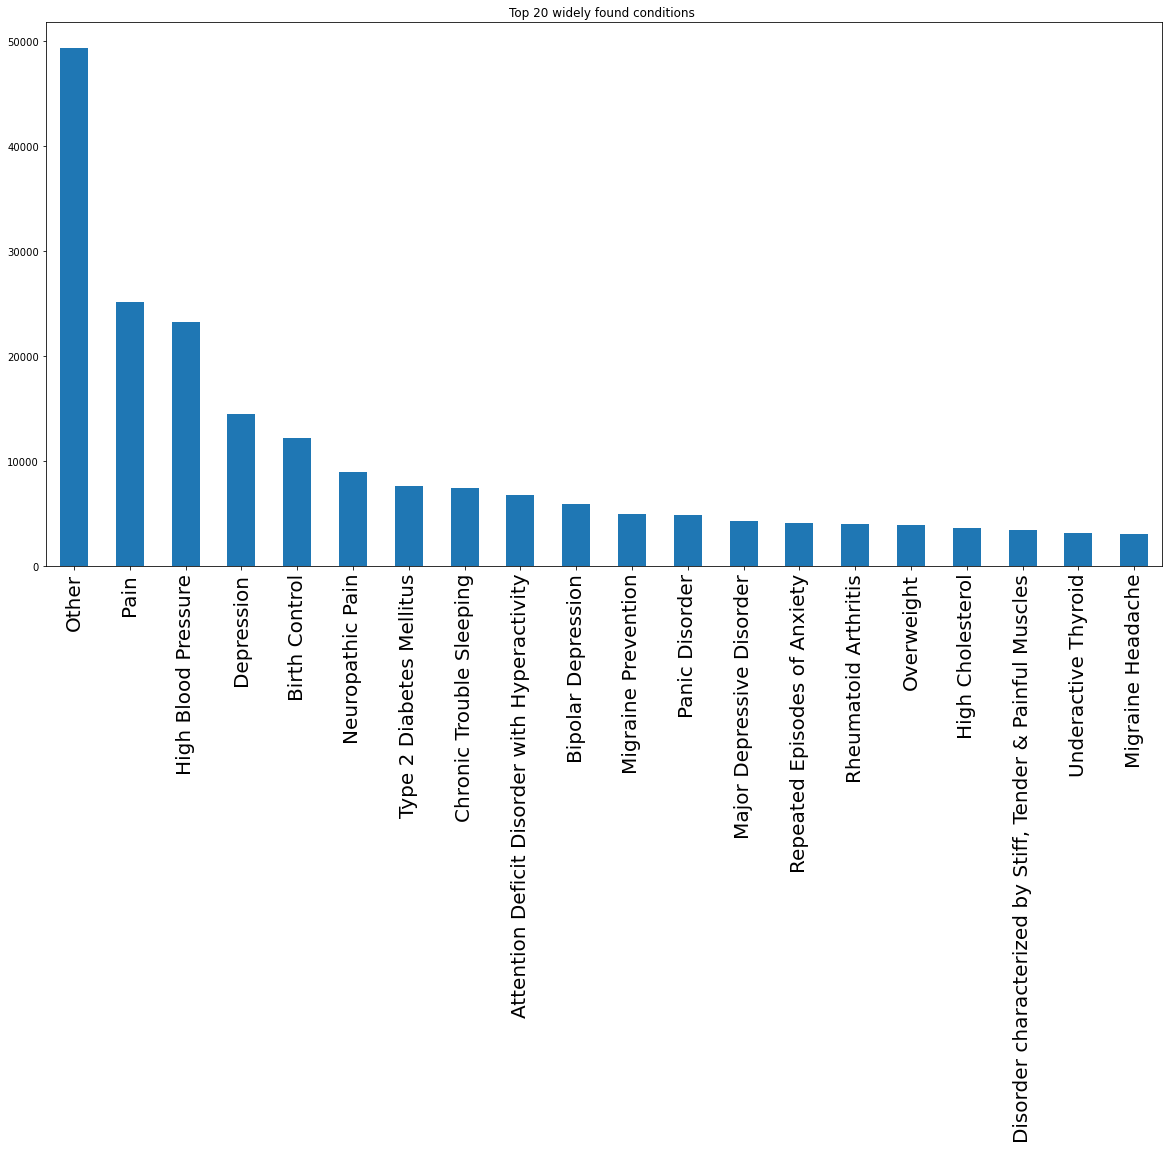

In [29]:
plt.figure(figsize=(5,5))
data['Condition'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))
plt.title("Top 20 widely found conditions ")
plt.xticks(size=20)
plt.show()

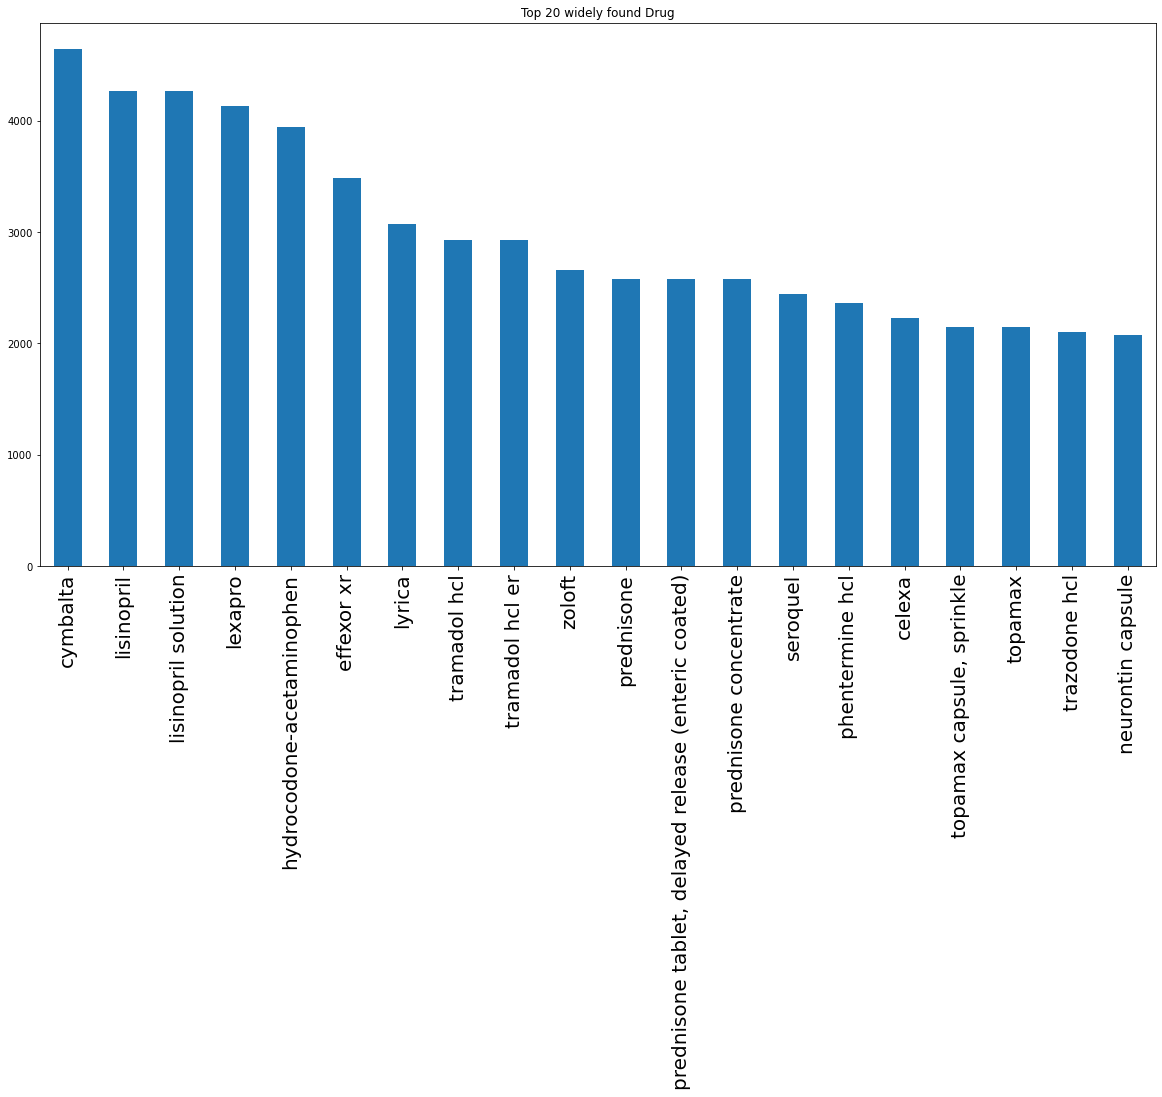

In [30]:
plt.figure(figsize=(5,5))
data['Drug'].value_counts().nlargest(20).plot(kind='bar',figsize=(20,10))
plt.title("Top 20 widely found Drug")
plt.xticks(size=20)
plt.show()

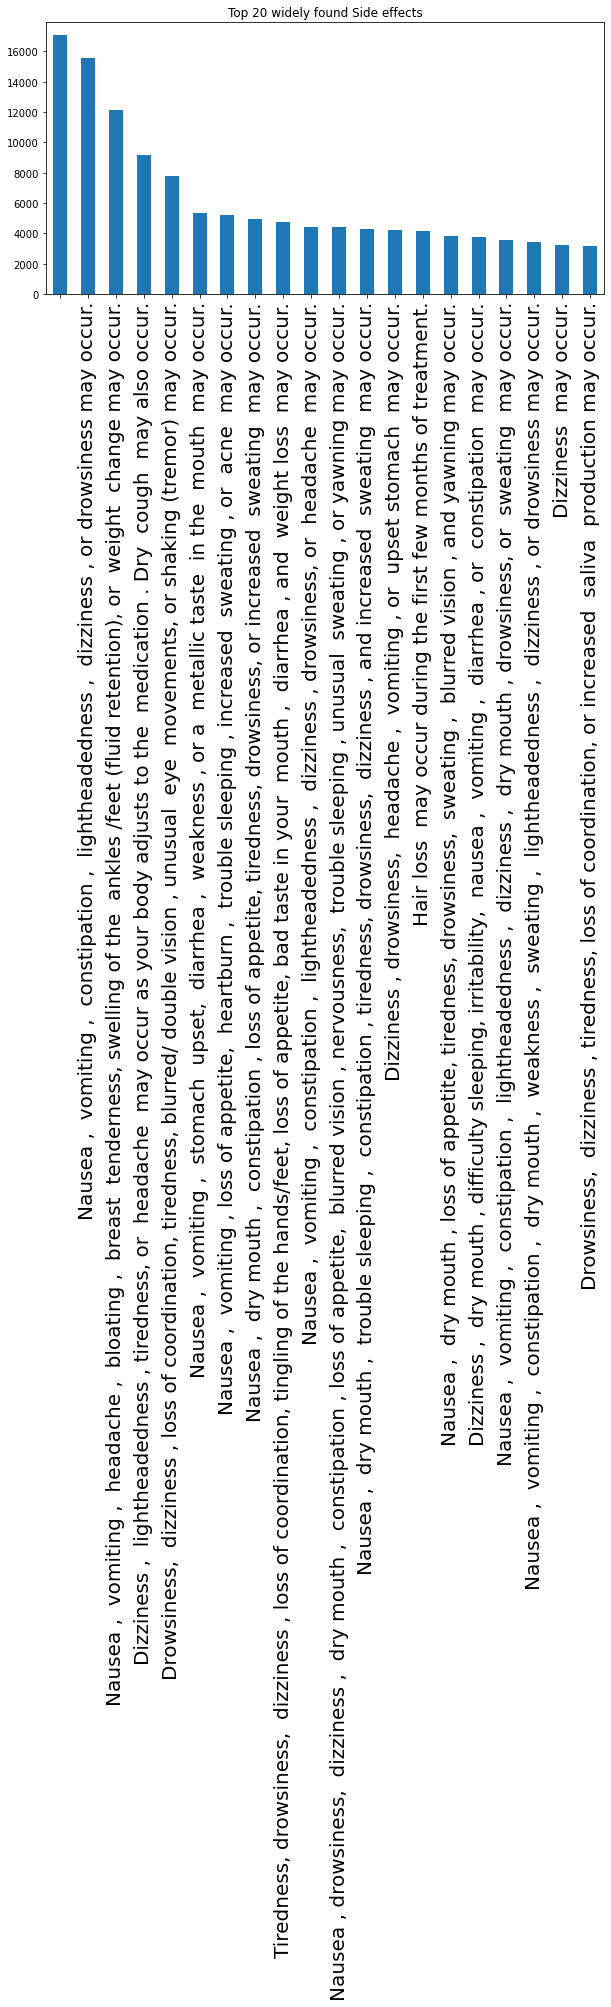

In [31]:
plt.figure(figsize=(5,5))
data['Sides'].value_counts().nlargest(20).plot(kind='bar',figsize=(10,5))
plt.title("Top 20 widely found Side effects")
plt.xticks(size=20)
plt.show()

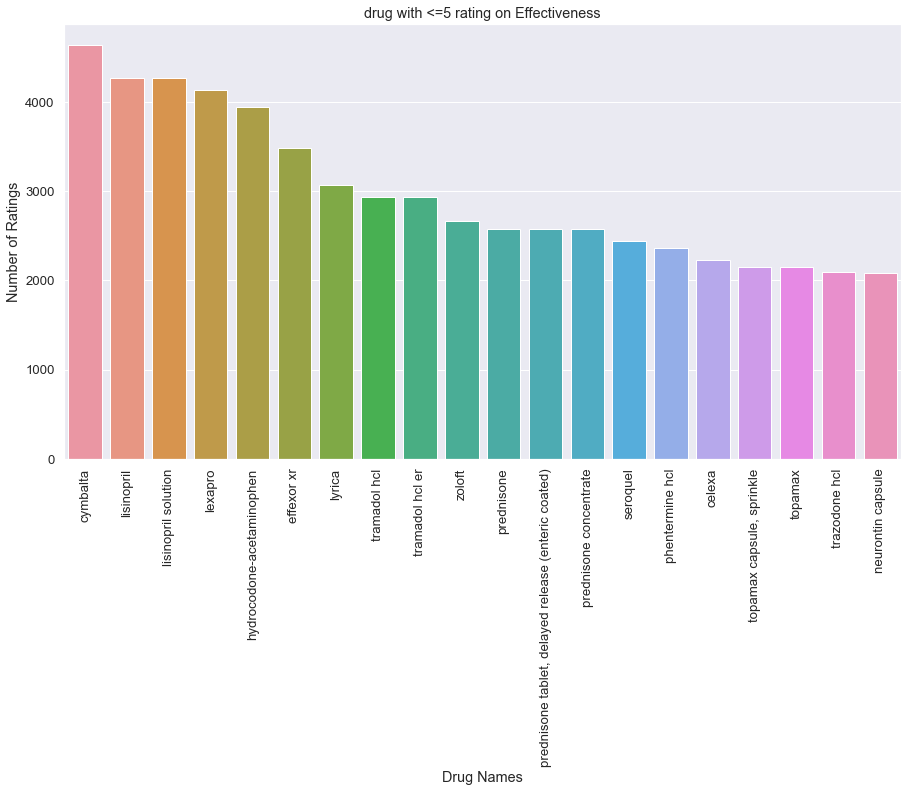

In [32]:
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

effect = dict(data.loc[data.Effectiveness<= 5, "Drug"].value_counts())
drugname = list(effect.keys())
drug_effect = list(effect.values())

sns_effect = sns.barplot(x = drugname[0:20], y = drug_effect[0:20])

sns_effect.set_title('drug with <=5 rating on Effectiveness')
sns_effect.set_ylabel("Number of Ratings")
sns_effect.set_xlabel("Drug Names")
plt.setp(sns_effect.get_xticklabels(), rotation=90);

In [33]:
effect_percnt =data['Effectiveness'].value_counts().sort_values(ascending=False).reset_index().rename(columns = {'index' :'Effectiveness', 'Effectiveness' : 'counts'})
effect_percnt['percent'] = 100 * (effect_percnt['counts']/data.shape[0])
print(effect_percnt)

   Effectiveness  counts    percent
0              5  130036  35.935147
1              4   81666  22.568210
2              3   60194  16.634472
3              1   59254  16.374705
4              2   30710   8.486637
5              6       2   0.000553
6             10       1   0.000276


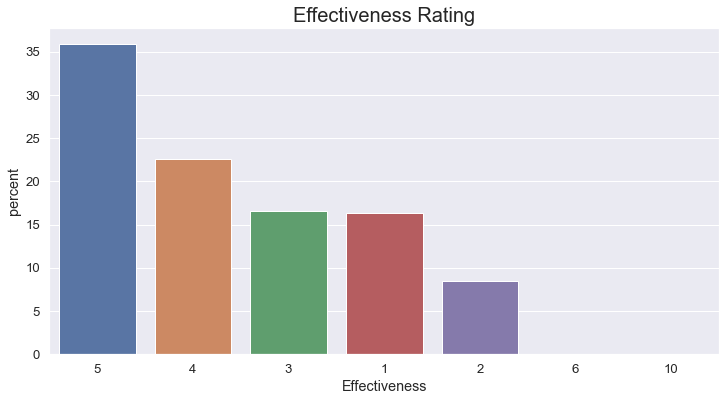

In [34]:
plt.rcParams['figure.figsize'] = [12,6]
#let's plot and check
sns.barplot(x =effect_percnt['Effectiveness'], y =effect_percnt['percent'],order =effect_percnt['Effectiveness'])
plt.title('Effectiveness Rating',fontsize=20)
plt.show()

In [35]:
categorical= data[['Age','Sex']]
for i in categorical:
    print("Value count of",i)
    print(data[i].value_counts(),)

Value count of Age
45-54         79868
55-64         74843
35-44         54949
25-34         49492
65-74         41122
19-24         24228
75 or over    15189
              12148
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64
Value count of Sex
Female    237758
Male       97667
           26438
Name: Sex, dtype: int64


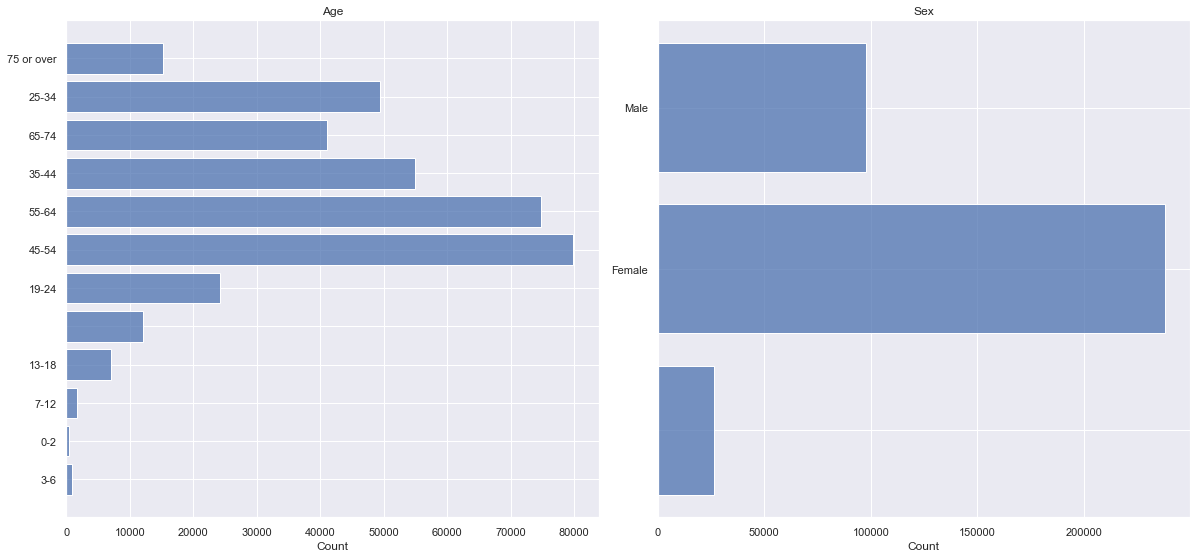

In [36]:
plt.subplots(figsize=(25, 15))
sns.set(color_codes =True)
for i,col in enumerate(categorical.columns):
      
    plt.subplot(2,3,i+1)
    plt.layout = (20,10)
    plt.sharex =True
    sns.histplot(data =data, y = col,shrink=.8)
    plt.ylabel("")
    plt.title(col)
    plt.tight_layout()

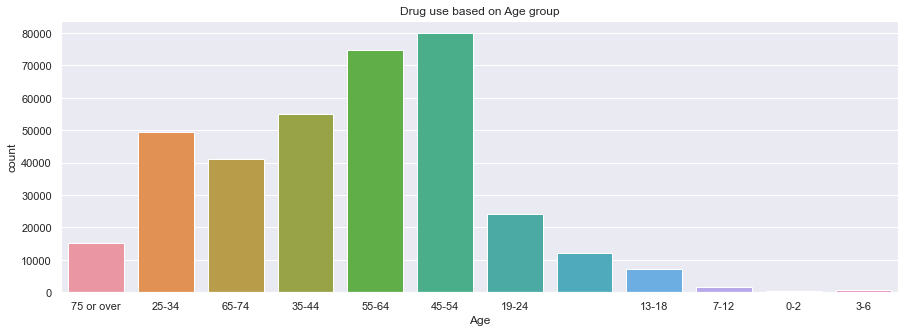

In [37]:
plt.figure(figsize=(15,5))
sns.countplot('Age',data= data)
plt.title('Drug use based on Age group')
plt.show()

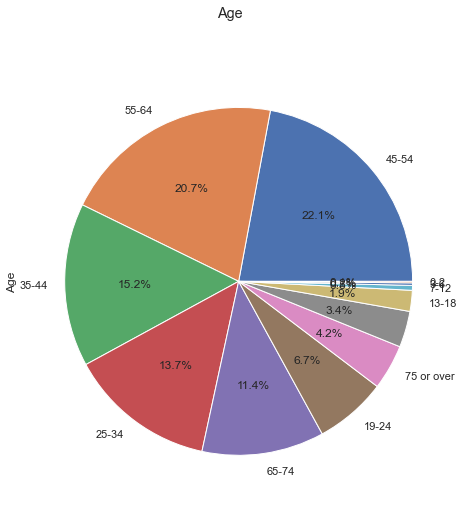

In [38]:
data.Age.value_counts().plot.pie(subplots = True,figsize =(10,8) ,autopct='%1.1f%%',title = "Age")
plt.show()

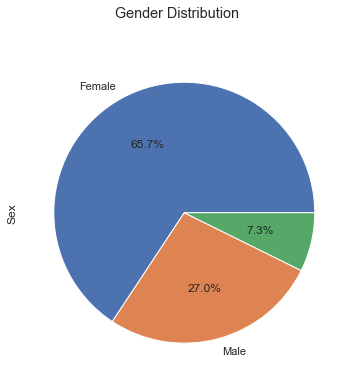

In [39]:
data.Sex.value_counts().plot.pie(subplots = True,figsize = (8,6),autopct='%1.1f%%',title = "Gender Distribution")
plt.show()

there are values in age and sex which are blank 
In age there are 12148 values with no description.
In gender distribution, 65.7% are Females, 27% are males and 7.3% ie,26438 are not defined 


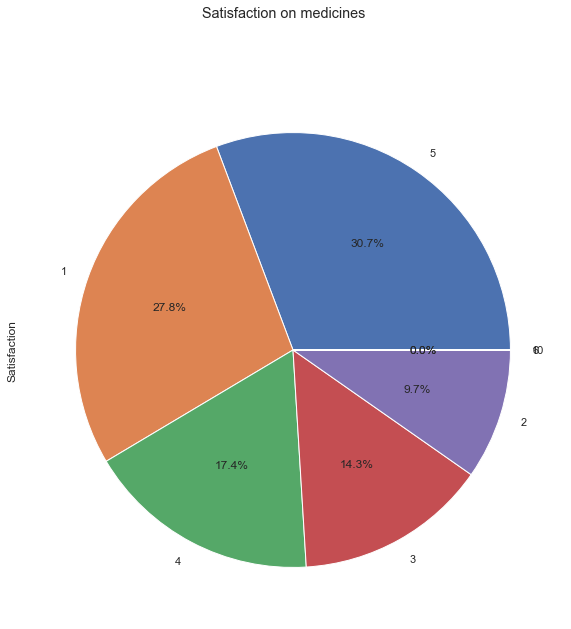

In [40]:
data.Satisfaction.value_counts().plot.pie(subplots = True,figsize = (10,10),autopct='%1.1f%%',title = "Satisfaction on medicines")
plt.show()

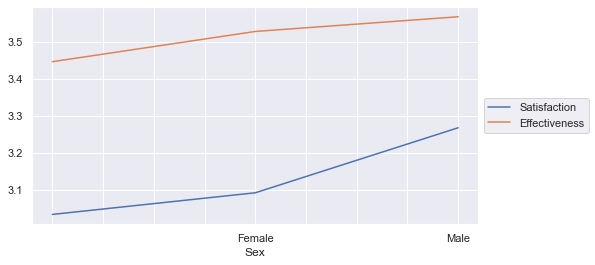

In [41]:
data.groupby('Sex')['Satisfaction','Effectiveness'].mean().plot(kind='line',grid='True', figsize=(8,4))\
.legend(loc='center left', bbox_to_anchor=(1, 0.5)); 

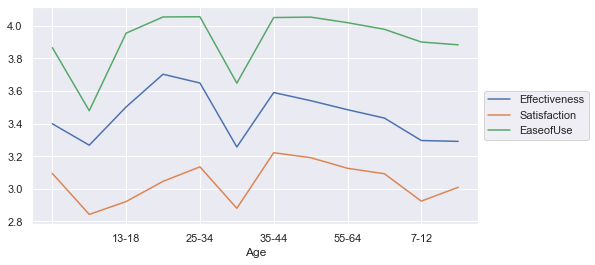

In [42]:
data.groupby('Age')['Effectiveness','Satisfaction', 'EaseofUse'].mean().plot(kind='line', figsize=(8,4)).legend(loc='center left', bbox_to_anchor=(1, 0.5));

<Figure size 1080x1440 with 0 Axes>

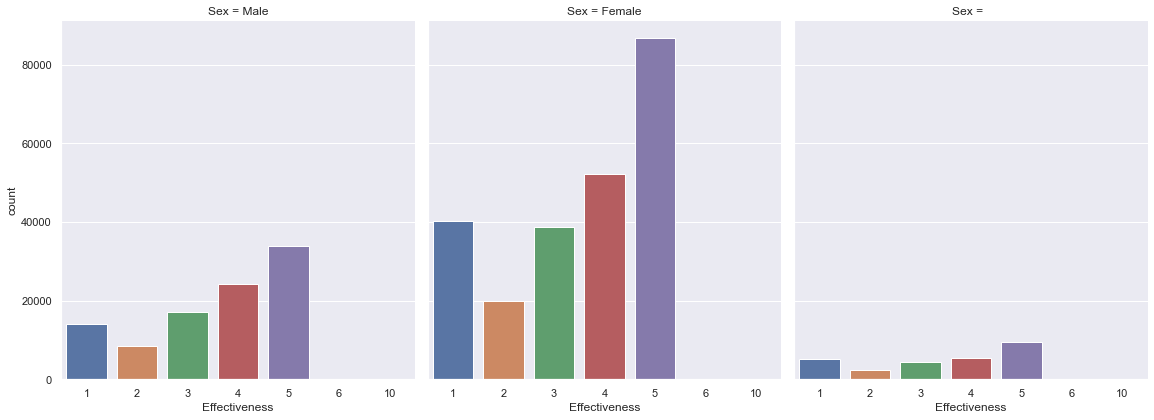

In [43]:
plt.figure(figsize=(15,20))
sns.catplot(x="Effectiveness",col="Sex",data=data, kind="count",
                height=6,aspect =.9)
plt.show()

Effectiveness of the drug is shown more in Females

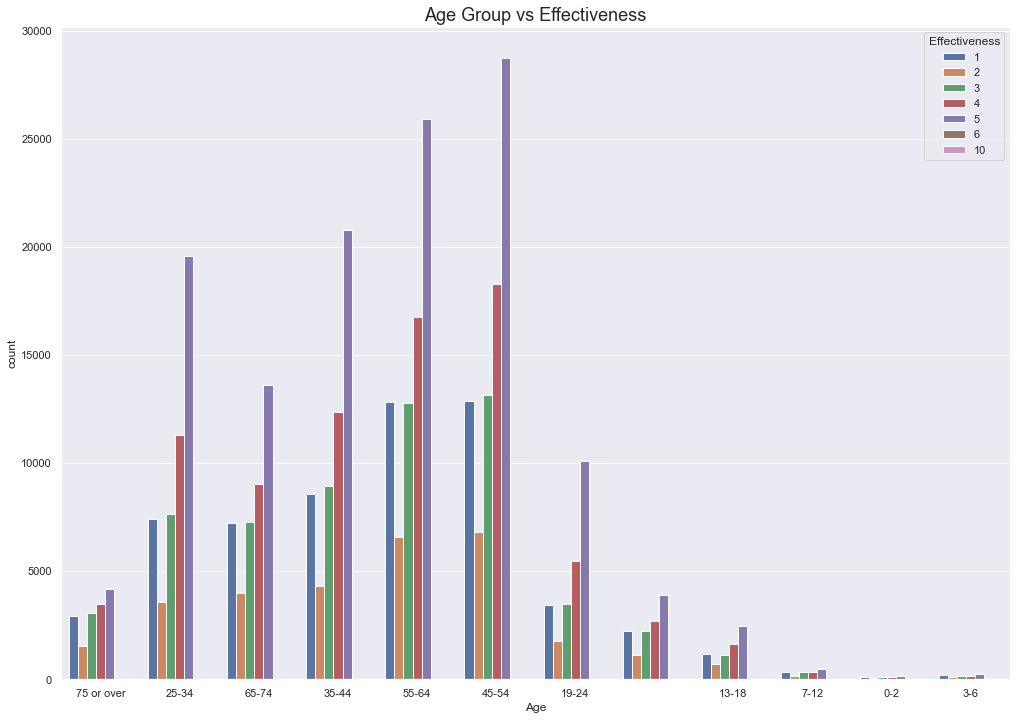

In [44]:
age_effect=data.groupby('Age')['Effectiveness'].sum()
plt.figure(figsize=(17,12))
plt.title('Age Group vs Effectiveness',fontsize=18)

sns.countplot(data=data,x="Age",hue="Effectiveness")
plt.show()

Effectiveness of the Drugs are more for age between45 and 54

while checking the correlation matrix effectiveness and satisfaction shows a high correlation ie, we eliminate satisfaction


In [45]:
data1= data.copy()

In [46]:
data1['Age']=np.where(data1['Age']==' ',np.nan,data1['Age'])
data1['Sex']=np.where(data1['Sex']==' ',np.nan,data1['Sex'])
data1['Reviews']=np.where(data1['Reviews']==' ',np.nan,data1['Reviews'])

In [47]:
data1['Age'].fillna('not disclosed', inplace=True)
data1['Sex'].fillna('not disclosed', inplace=True)

In [48]:
data1['Sex'].value_counts()

Female           237758
Male              97667
not disclosed     26438
Name: Sex, dtype: int64

In [49]:
data1['Reviews'] = data1['Reviews'].fillna('No review')

In [50]:
data1.isna().sum()

Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [51]:
data1['Sides']=np.where(data1['Sides']==' ','No side effects',data1['Sides'])

In [52]:
data1[data1['Sides']=='No side effects'].value_counts().sum()

17064

In [53]:
#!pip install textblob


In [54]:
from textblob import TextBlob

In [55]:
def sentiment_polarity(text):
    side_sentiment=TextBlob(text).sentiment.polarity
    return side_sentiment

In [56]:
data2=data1.copy()

In [57]:
import nltk
#nltk.download('stopwords')
#nltk.download('wordnet')
#nltk.download('omw-1.4')

In [58]:
#!pip install wordcloud

In [59]:
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words=set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

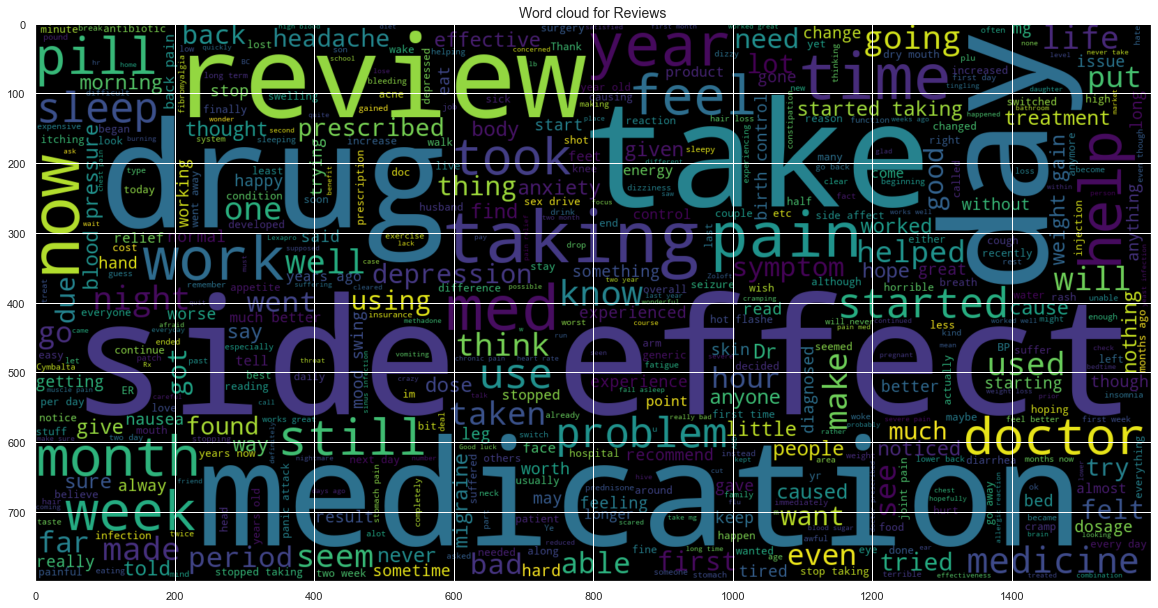

In [60]:
plt.figure(figsize = (20,20)) # Text that is Fake News Headlines
wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(data2.Reviews))
plt.imshow(wc , interpolation = 'bilinear')
plt.title('Word cloud for Reviews',fontsize=14)
plt.show()

In [61]:
def clean_data(raw_data):
    #Delete HTML 
    text = BeautifulSoup(raw_data, 'html.parser').get_text()
    #Make a space
    text = re.sub('[^a-zA-Z]', ' ', text)
    #lower letters
    text = text.lower().split()
    #Stopwords 
    meaningful_text = [w for w in text if not w in stop_words]
    #lemmitization
    lemmatizer = WordNetLemmatizer()
    lemmitize_words = [lemmatizer.lemmatize(w) for w in meaningful_text]
    #space join words
    return( ' '.join(lemmitize_words))

In [62]:
from bs4 import BeautifulSoup

In [63]:
import re
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from nltk.stem import WordNetLemmatizer

In [64]:
data2['Reviews_cleaned'] = data2['Reviews'].apply(clean_data)

In [65]:
data2['Review_score'] = data2['Reviews_cleaned'].apply(sentiment_polarity)

In [66]:
data2.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Reviews_cleaned,Review_score
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,retired physician med tried allergy seasonal o...,0.283333
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,cleared right even throat hurting went away ta...,0.285714
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,No side effects,0,ptinr go normal,0.150000
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,No side effects,0,falling realise,0.000000
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,No side effects,1,grandfather prescribed medication coumadin ass...,0.046429


In [67]:
data2['Review_score'].describe()

count    361863.000000
mean          0.044636
std           0.246630
min          -1.000000
25%          -0.027778
50%           0.000000
75%           0.155000
max           1.000000
Name: Review_score, dtype: float64

In [68]:
data3=np.where(data2['Review_score']==1, "No side effects", data2['Review_score'])
data3=np.where((data2['Review_score']<1) &(data2['Review_score']>0), "Mild", data3)
data3=np.where(data2['Review_score']==0, "Moderate", data3)
data3=np.where((data2['Review_score']<0) &(data2['Review_score']>-1),"Severe" , data3)
data3=np.where(data2['Review_score']== -1, "Extremely Severe", data3)

In [69]:
data3


array(['Mild', 'Mild', 'Mild', ..., 'Severe', 'Severe', 'Mild'],
      dtype='<U32')

In [70]:
data2['side_effects']=data3

In [71]:
data2['side_effects'].value_counts()

Mild                163775
Severe               99604
Moderate             95887
Extremely Severe      1534
No side effects       1063
Name: side_effects, dtype: int64

In [72]:
data2.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Reviews_cleaned,Review_score,side_effects
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0,retired physician med tried allergy seasonal o...,0.283333,Mild
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1,cleared right even throat hurting went away ta...,0.285714,Mild
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,No side effects,0,ptinr go normal,0.150000,Mild
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,No side effects,0,falling realise,0.000000,Moderate
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,No side effects,1,grandfather prescribed medication coumadin ass...,0.046429,Mild


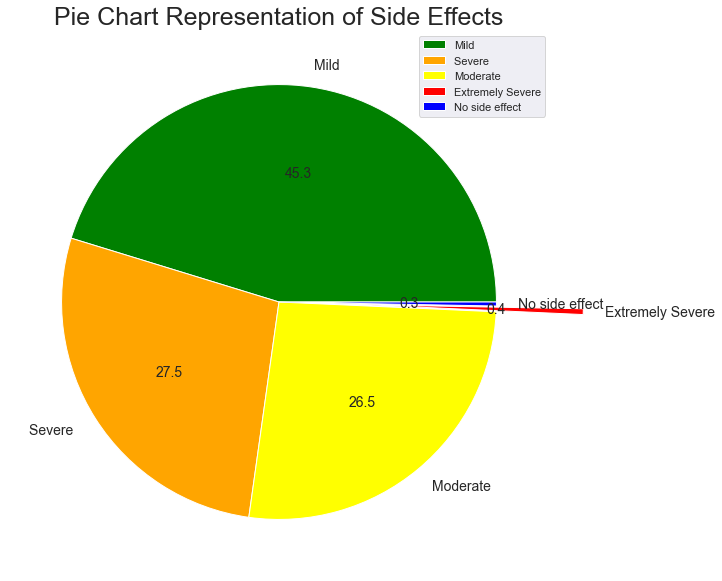

In [73]:
plt.rcParams['figure.figsize'] = (15, 10)
#plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.1f%%')
plt.pie(data2['side_effects'].value_counts(),autopct='%1.1f',explode=[0,0.0,0.0,0.4,0],
        labels=["Mild","Severe ","Moderate","Extremely Severe","No side effect"],textprops={'fontsize': 14},
       colors=['green','orange','yellow' ,'red','blue'],startangle=360)
plt.title('Pie Chart Representation of Side Effects', fontsize = 25)
plt.legend()
plt.show()

In [74]:
data4= data2.copy()

#### For side effect classification here, I am taking the most widely used Drug- Cymbalta

In [75]:
data4= data4[data4['Drug']=='cymbalta'] 

In [76]:
data4.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Reviews_cleaned,Review_score,side_effects
314212,not disclosed,Major Depressive Disorder,2/29/2020,cymbalta,91491,5,5,No Script or health Insurance needed to place ...,5,not disclosed,"Nausea , dry mouth , constipation , loss of ...",12,script health insurance needed place order dis...,0.600000,Mild
314216,45-54,Repeated Episodes of Anxiety,1/13/2020,cymbalta,91491,3,1,I was prescribed Cymbalta for anxiety and star...,1,Male,"Nausea , dry mouth , constipation , loss of ...",0,prescribed cymbalta anxiety started low dosage...,-0.233333,Severe
314223,45-54,Anxiousness associated with Depression,1/4/2020,cymbalta,91491,5,5,Switched from Effexor to this medicine after 1...,5,not disclosed,"Nausea , dry mouth , constipation , loss of ...",0,switched effexor medicine year issue transitio...,0.264394,Mild
314235,35-44,Anxiousness associated with Depression,12/6/2019,cymbalta,91491,3,3,Bipolar I with a neck fusion. Pdoc prescribed ...,2,Female,"Nausea , dry mouth , constipation , loss of ...",0,bipolar neck fusion pdoc prescribed depression...,0.140000,Mild
314246,55-64,Chronic Muscle or Bone Pain,11/20/2019,cymbalta,91491,2,2,"I have depression, anxiety, Fibro, severe musc...",2,not disclosed,"Nausea , dry mouth , constipation , loss of ...",1,depression anxiety fibro severe muscle spasm d...,-0.100000,Severe


In [77]:
data4['Condition'].value_counts()

Major Depressive Disorder                                    1937
Neuropathic Pain                                              699
Repeated Episodes of Anxiety                                  577
Other                                                         514
Disorder characterized by Stiff, Tender & Painful Muscles     409
Chronic Muscle or Bone Pain                                   405
Anxiousness associated with Depression                         55
Diabetic Complication causing Injury to some Body Nerves       50
Name: Condition, dtype: int64

In [78]:
data4['Sex'].value_counts()

Female           3619
Male              830
not disclosed     197
Name: Sex, dtype: int64

In [79]:
data4['side_effects'].value_counts()

Mild                2131
Severe              1388
Moderate            1073
Extremely Severe      41
No side effects       13
Name: side_effects, dtype: int64

In [80]:
data4['Age'].value_counts()

45-54            1289
55-64            1008
35-44             874
25-34             594
65-74             400
19-24             225
not disclosed     118
75 or over        102
13-18              34
0-2                 1
7-12                1
Name: Age, dtype: int64

In [81]:
data4['Age'] = data4['Age'].map({'not disclosed':0,
                                              '0-2': 1, 
                                               '3-6': 2,
                                               '7-12': 3,
                                               '13-18': 4,
                                               '19-24': 5,
                                               '25-34': 6,
                                               '35-44': 7,
                                               '45-54': 8,
                                               '55-64': 9,
                                               '65-74': 10,
                                               '75 or over': 11}).astype(int)

In [82]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data4['Condition']=le.fit_transform(data4['Condition'])
data4.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,Reviews_cleaned,Review_score,side_effects
314212,0,4,2/29/2020,cymbalta,91491,5,5,No Script or health Insurance needed to place ...,5,not disclosed,"Nausea , dry mouth , constipation , loss of ...",12,script health insurance needed place order dis...,0.600000,Mild
314216,8,7,1/13/2020,cymbalta,91491,3,1,I was prescribed Cymbalta for anxiety and star...,1,Male,"Nausea , dry mouth , constipation , loss of ...",0,prescribed cymbalta anxiety started low dosage...,-0.233333,Severe
314223,8,0,1/4/2020,cymbalta,91491,5,5,Switched from Effexor to this medicine after 1...,5,not disclosed,"Nausea , dry mouth , constipation , loss of ...",0,switched effexor medicine year issue transitio...,0.264394,Mild
314235,7,0,12/6/2019,cymbalta,91491,3,3,Bipolar I with a neck fusion. Pdoc prescribed ...,2,Female,"Nausea , dry mouth , constipation , loss of ...",0,bipolar neck fusion pdoc prescribed depression...,0.140000,Mild
314246,9,1,11/20/2019,cymbalta,91491,2,2,"I have depression, anxiety, Fibro, severe musc...",2,not disclosed,"Nausea , dry mouth , constipation , loss of ...",1,depression anxiety fibro severe muscle spasm d...,-0.100000,Severe


In [83]:
data4=pd.get_dummies(data4,columns=['Sex'],drop_first=True)

In [84]:
data4.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sides,UsefulCount,Reviews_cleaned,Review_score,side_effects,Sex_Male,Sex_not disclosed
314212,0,4,2/29/2020,cymbalta,91491,5,5,No Script or health Insurance needed to place ...,5,"Nausea , dry mouth , constipation , loss of ...",12,script health insurance needed place order dis...,0.600000,Mild,0,1
314216,8,7,1/13/2020,cymbalta,91491,3,1,I was prescribed Cymbalta for anxiety and star...,1,"Nausea , dry mouth , constipation , loss of ...",0,prescribed cymbalta anxiety started low dosage...,-0.233333,Severe,1,0
314223,8,0,1/4/2020,cymbalta,91491,5,5,Switched from Effexor to this medicine after 1...,5,"Nausea , dry mouth , constipation , loss of ...",0,switched effexor medicine year issue transitio...,0.264394,Mild,0,1
314235,7,0,12/6/2019,cymbalta,91491,3,3,Bipolar I with a neck fusion. Pdoc prescribed ...,2,"Nausea , dry mouth , constipation , loss of ...",0,bipolar neck fusion pdoc prescribed depression...,0.140000,Mild,0,0
314246,9,1,11/20/2019,cymbalta,91491,2,2,"I have depression, anxiety, Fibro, severe musc...",2,"Nausea , dry mouth , constipation , loss of ...",1,depression anxiety fibro severe muscle spasm d...,-0.100000,Severe,0,1


In [85]:
data4.columns

Index(['Age', 'Condition', 'Date', 'Drug', 'DrugId', 'EaseofUse',
       'Effectiveness', 'Reviews', 'Satisfaction', 'Sides', 'UsefulCount',
       'Reviews_cleaned', 'Review_score', 'side_effects', 'Sex_Male',
       'Sex_not disclosed'],
      dtype='object')

In [86]:
data4.drop(['Date','Drug','DrugId','Reviews','Sides','Reviews_cleaned'],axis=1,inplace=True)

In [87]:
data4.head()

,Age,Condition,EaseofUse,Effectiveness,Satisfaction,UsefulCount,Review_score,side_effects,Sex_Male,Sex_not disclosed
314212,0,4,5,5,5,12,0.600000,Mild,0,1
314216,8,7,3,1,1,0,-0.233333,Severe,1,0
314223,8,0,5,5,5,0,0.264394,Mild,0,1
314235,7,0,3,3,2,0,0.140000,Mild,0,0
314246,9,1,2,2,2,1,-0.100000,Severe,0,1


In [88]:
from sklearn.metrics import accuracy_score,precision_score,f1_score, recall_score ,confusion_matrix

In [89]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data4['side_effects']=le.fit_transform(data4['side_effects'])

In [90]:
x=data4.drop('side_effects',axis=1)
y=data4['side_effects']

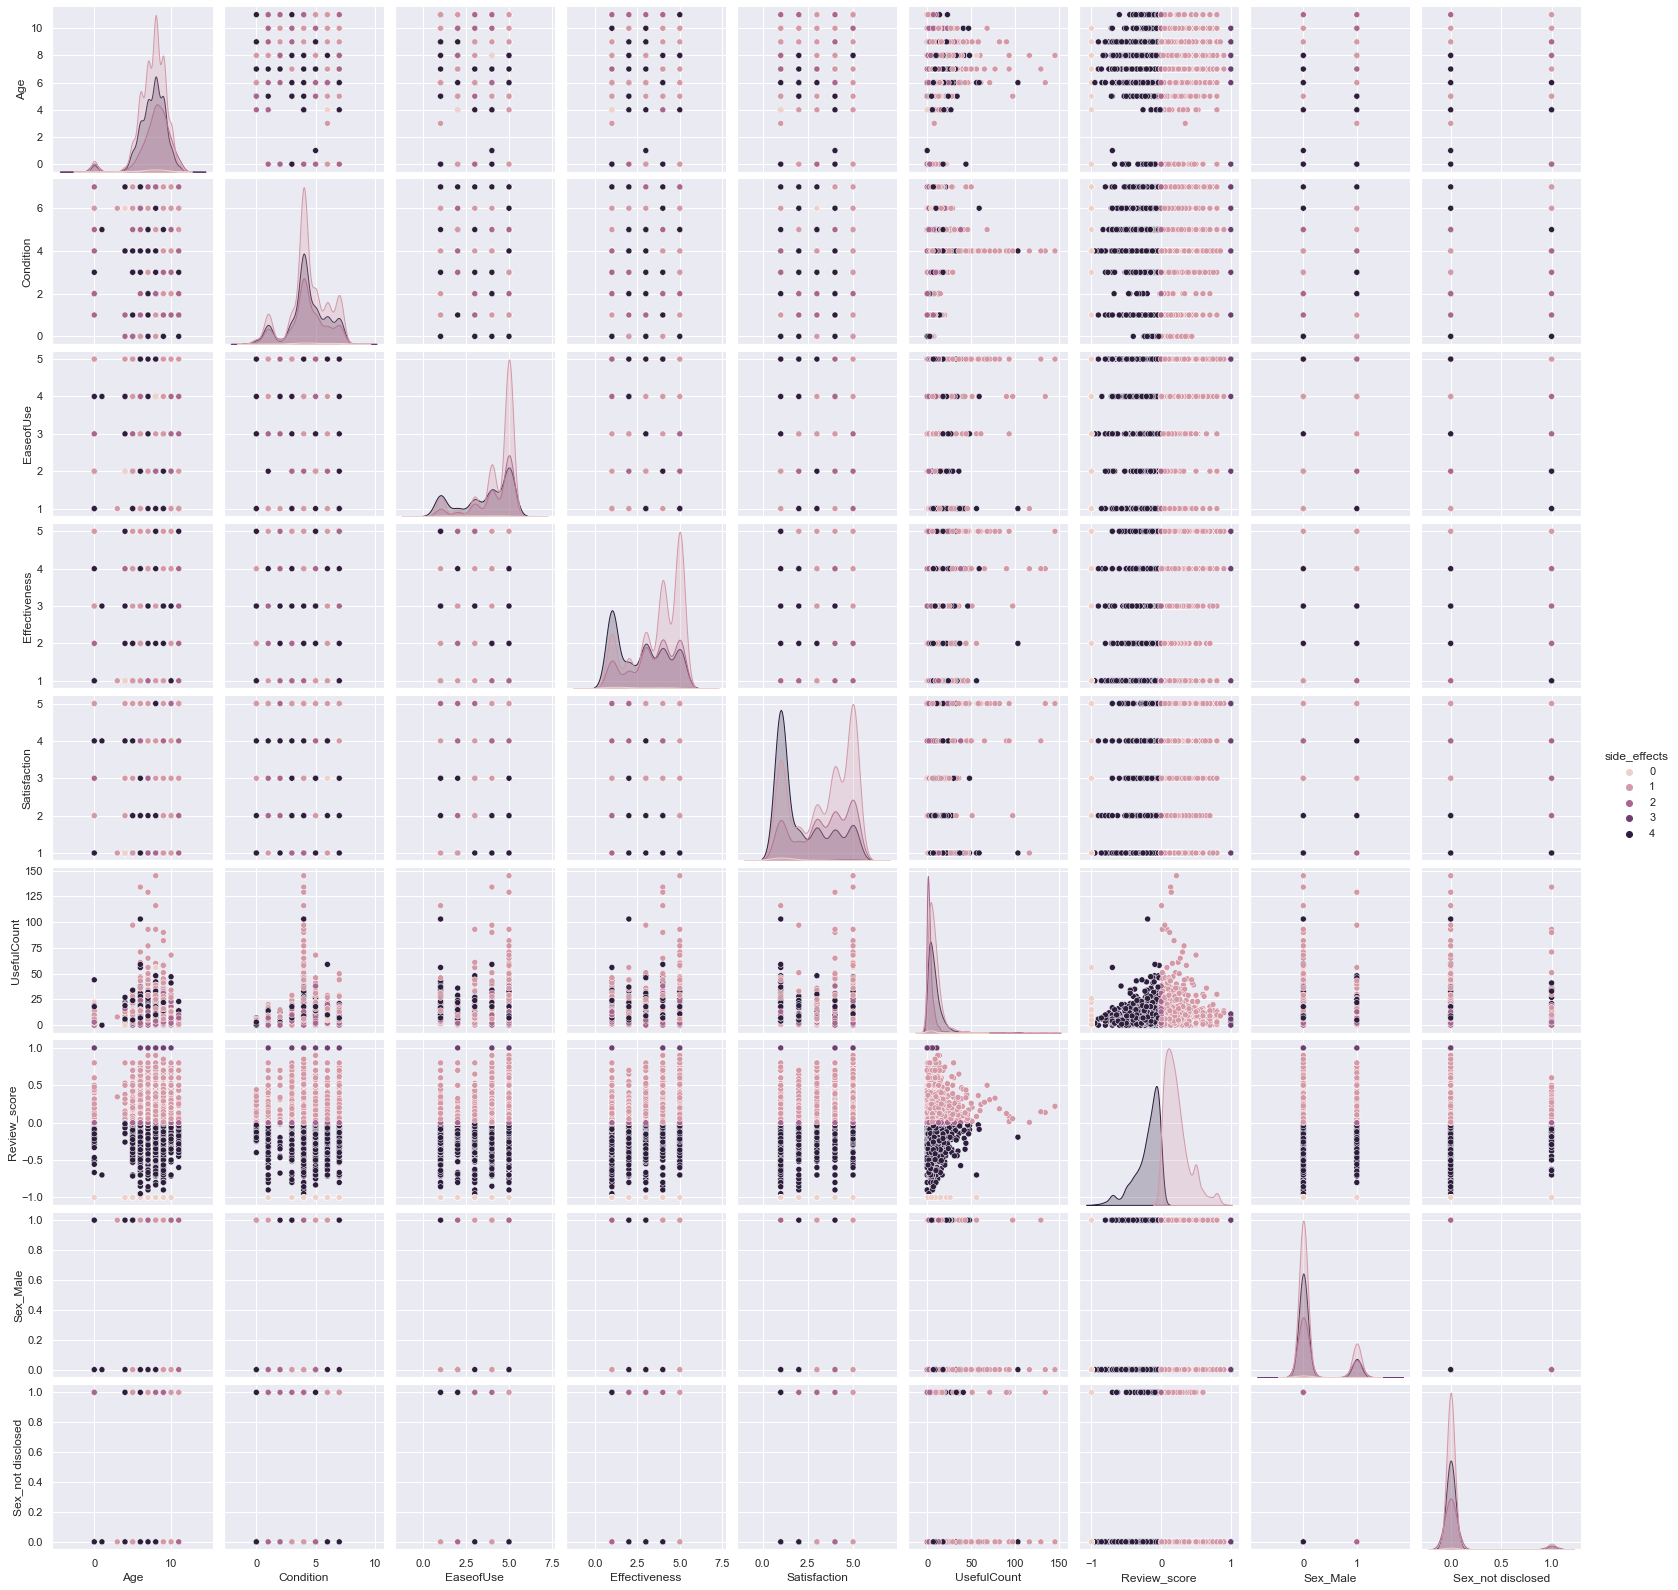

In [91]:
sns.pairplot(data4,hue='side_effects')
plt.show()

In [92]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.25)

#### Logistic Regression

In [93]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_model= log_reg.fit(x_train,y_train)
y_pred= log_model.predict(x_test)

In [94]:
f1_score(y_test,y_pred,average='micro')

0.8769363166953529

In [95]:
confusion_matrix(y_test,y_pred)

array([[  0,   0,   0,   0,  14],
       [  0, 490,  35,   0,   2],
       [  0,  25, 232,   0,  18],
       [  0,   5,   0,   0,   0],
       [  0,   2,  42,   0, 297]], dtype=int64)

In [96]:
accuracy_score(y_test,y_pred)

0.8769363166953529

In [97]:
acc_lr= accuracy_score(y_test,y_pred)*100
f1_lr=f1_score(y_test,y_pred,average='micro')*100

In [98]:
#scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)
log_reg.fit(x_train_sc,y_train)
ypred=log_reg.predict(x_test_sc)
f1_score(y_test,ypred,average='micro')

0.9268502581755593

In [99]:
f1_lr_sc=f1_score(y_test,ypred,average='micro')*100
acc_lr_sc= accuracy_score(y_test,ypred)*100

#### K- Nearest Neighbours

In [100]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors= np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn_model= classifier.fit(x_train,y_train)
    y_predict= knn_model.predict(x_test)
    acc= accuracy_score(y_test,y_predict)
    acc_values.append(acc)

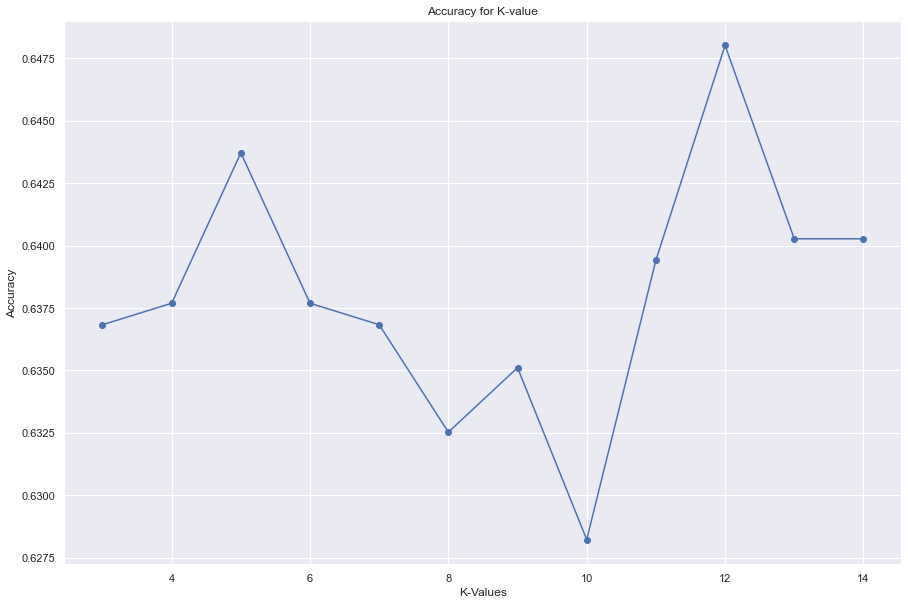

In [101]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('Accuracy for K-value')
plt.show()

In [102]:
classifier= KNeighborsClassifier(n_neighbors=12,metric='minkowski')
knn_model= classifier.fit(x_train,y_train)
y_predict= knn_model.predict(x_test)

In [103]:
f1_score(y_test,y_predict,average='micro')

0.6480206540447504

In [104]:
confusion_matrix(y_test,y_predict)

array([[  0,   6,   3,   0,   5],
       [  0, 406,  54,   0,  67],
       [  0,  80, 170,   0,  25],
       [  0,   5,   0,   0,   0],
       [  0, 120,  44,   0, 177]], dtype=int64)

In [105]:
accuracy_score(y_test,y_predict)

0.6480206540447504

In [106]:
acc_KN= accuracy_score(y_test,y_predict)*100
f1_KN=f1_score(y_test,y_predict,average='micro')*100

In [107]:
#scaled
classifier.fit(x_train_sc,y_train)
ypred=classifier.predict(x_test_sc)
f1_score(y_test,ypred,average='micro')

0.7762478485370051

In [108]:
f1_KN_sc=f1_score(y_test,ypred,average='micro')*100
acc_KN_sc= accuracy_score(y_test,ypred)*100

#### Decision Tree Classifier

In [109]:
from sklearn.tree import DecisionTreeClassifier
dt=  DecisionTreeClassifier()
dt_model=dt.fit(x_train,y_train)
y_predict =dt_model.predict(x_test)
f1_score(y_test,y_predict,average='micro')

0.9974182444061962

In [110]:
confusion_matrix(y_test,y_predict)

array([[ 14,   0,   0,   0,   0],
       [  0, 525,   2,   0,   0],
       [  0,   1, 274,   0,   0],
       [  0,   0,   0,   5,   0],
       [  0,   0,   0,   0, 341]], dtype=int64)

In [111]:
accuracy_score(y_test,y_predict)

0.9974182444061962

In [112]:
acc_dt= accuracy_score(y_test,y_predict)*100
f1_dt=f1_score(y_test,y_predict,average='micro')*100


In [113]:
#scaled
dt.fit(x_train_sc,y_train)
ypred=dt.predict(x_test_sc)
f1_score(y_test,ypred,average='micro')

0.9974182444061962

#### Random Forest Classifier

In [114]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
random_model=rfc.fit(x_train,y_train)
y_predict=random_model.predict(x_test)

In [115]:
f1_score(y_test,y_predict,average='micro')

0.9931153184165232

In [116]:
confusion_matrix(y_test,y_predict)

array([[ 11,   0,   0,   0,   3],
       [  0, 525,   2,   0,   0],
       [  0,   0, 275,   0,   0],
       [  0,   3,   0,   2,   0],
       [  0,   0,   0,   0, 341]], dtype=int64)

In [117]:
acc_rf= accuracy_score(y_test,y_predict)*100
f1_rf=f1_score(y_test,y_predict,average='micro')*100

In [118]:
#scaled
rfc.fit(x_train_sc,y_train)
ypred=rfc.predict(x_test_sc)
f1_score(y_test,ypred,average='micro')

0.9913941480206541

#### Linear support vector machine

In [119]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm_model= svm.fit(x_train,y_train)
y_pred= svm_model.predict(x_test)

In [120]:
f1_score(y_test,y_pred,average='micro')

0.9053356282271945

In [121]:
confusion_matrix(y_test,y_pred)

array([[ 13,   0,   0,   0,   1],
       [  0, 479,  48,   0,   0],
       [  0,   7, 263,   0,   5],
       [  0,   5,   0,   0,   0],
       [  2,   1,  41,   0, 297]], dtype=int64)

In [122]:
accuracy_score(y_test,y_pred)

0.9053356282271945

In [123]:
acc_svm= accuracy_score(y_test,y_pred)*100
f1_svm=f1_score(y_test,y_pred,average='micro')*100

In [124]:
#scaled
svm.fit(x_train_sc,y_train)
ypred=svm.predict(x_test_sc)
f1_score(y_test,ypred,average='micro')

0.9543889845094664

In [125]:
f1_svm_sc=f1_score(y_test,ypred,average='micro')*100
acc_svm_sc= accuracy_score(y_test,ypred)*100

#### Gaussian Naive Bayes

In [131]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb_model=gnb.fit(x_train,y_train)
y_pred_gnb=gnb_model.predict(x_test)

In [132]:
f1_gnb=f1_score(y_test,y_pred_gnb, average='micro')*100
f1_gnb

87.34939759036145

In [133]:
acc_gnb=accuracy_score(y_test,y_pred_gnb)*100
acc_gnb

87.34939759036145

In [135]:
#scaled
gnb.fit(x_train_sc,y_train)
ypred=gnb.predict(x_test_sc)
f1_score(y_test,ypred,average='micro')

0.8743545611015491

#### Bernoulli Naive Bayes

In [136]:
from sklearn.naive_bayes import BernoulliNB
bnb= BernoulliNB()
bnb_model= bnb.fit(x_train,y_train)
y_pred_bnb= bnb_model.predict(x_test)

In [137]:
f1_bnb= f1_score(y_test,y_pred_bnb, average='micro')*100
f1_bnb

79.43201376936317

In [138]:
acc_bnb= accuracy_score(y_test,y_pred_bnb)*100
acc_bnb

79.43201376936317

In [139]:
#scaled
bnb.fit(x_train_sc,y_train)
ypred=bnb.predict(x_test_sc)
f1_score(y_test,ypred,average='micro')

0.7710843373493976

In [140]:

results = pd.DataFrame({
    'Model': ['Logistic Regression', 
              'Logistic Regression Scaled',
              'KNN','KNN Scaled',
              'Decision Tree',
              'Linear SVM','Linear SVM Scaled',
              'Random Forest','Gaussian Naive Bayes','Bernoulli Naive Bayes'],
    'f1-Score': [ f1_lr,f1_lr_sc,
                      f1_KN, f1_KN_sc,
                      f1_dt,
                      f1_svm,f1_svm_sc,
                      f1_rf,f1_gnb,f1_bnb],
    'Accuracy_score':[ acc_lr,acc_lr_sc,
                      acc_KN, acc_KN_sc,
                      acc_dt,
                      acc_svm,acc_svm_sc,
                      acc_rf,acc_gnb,acc_bnb]})

In [141]:
result_df = results.sort_values(by='f1-Score',ascending= False)
result_df.reset_index(drop=True, inplace=True)
result_df.head(7)

,Model,f1-Score,Accuracy_score
0,Decision Tree,99.741824,99.741824
1,Random Forest,99.311532,99.311532
2,Linear SVM Scaled,95.438898,95.438898
3,Logistic Regression Scaled,92.685026,92.685026
4,Linear SVM,90.533563,90.533563
5,Logistic Regression,87.693632,87.693632
6,Gaussian Naive Bayes,87.349398,87.349398


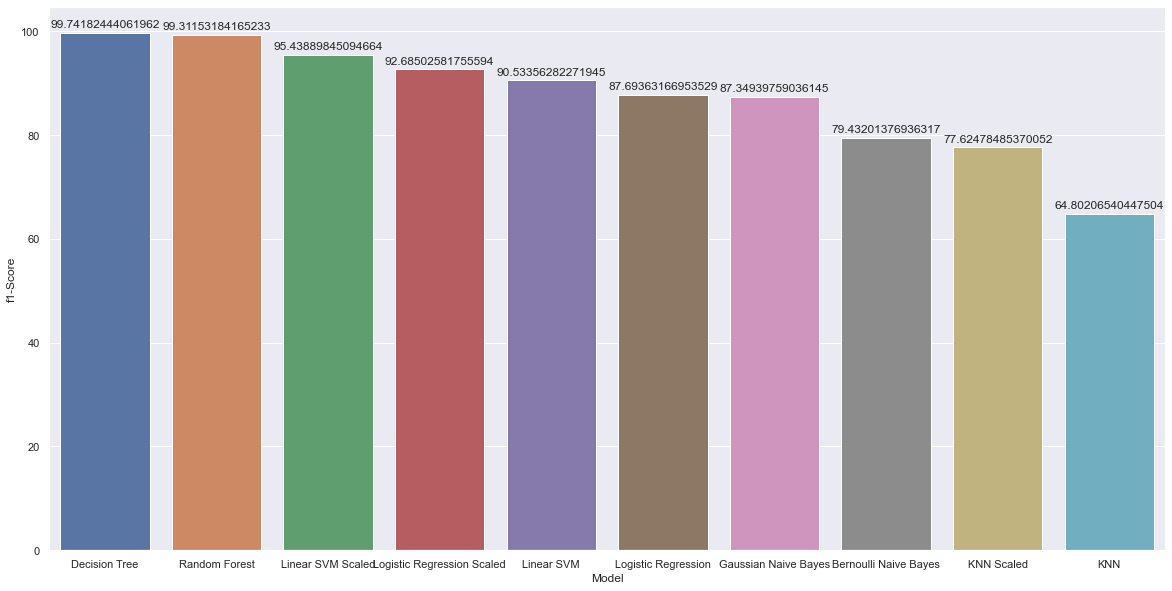

In [142]:
plt.subplots(figsize=(20,10))
ax=sns.barplot(x='Model',y='f1-Score',data=result_df)
labels = (result_df['f1-Score'])
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center')

In [143]:
%%time
#Prediction probabilities for logistic regression with and without scaling
pred_prob1 = log_reg.predict_proba(x_test)
pred_prob2 = log_reg.predict_proba(x_test_sc)

#Prediction probabilities for kNN 
pred_prob3 = classifier.predict_proba(x_test)
pred_prob8 = classifier.predict_proba(x_test_sc)
#Prediction Probabilities for Decision Tree classifier 
pred_prob4 = dt.predict_proba(x_test)
#Prediction Probabilities for Random Forest classifier 
pred_prob5 = rfc.predict_proba(x_test)
#Prediction Probabilities for Naive Bayes classifier 
pred_prob6 = gnb.predict_proba(x_test)
pred_prob7 = bnb.predict_proba(x_test)


CPU times: total: 125 ms
Wall time: 142 ms


In [144]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thr1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thr2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)
fpr3, tpr3, thr3 = roc_curve(y_test, pred_prob3[:,1], pos_label=1)
fpr4, tpr4, thr4 = roc_curve(y_test, pred_prob4[:,1], pos_label=1)
fpr5, tpr5, thr5 = roc_curve(y_test, pred_prob5[:,1], pos_label=1)
fpr6, tpr6, thr6 = roc_curve(y_test, pred_prob6[:,1], pos_label=1)
fpr7, tpr7, thr7 = roc_curve(y_test, pred_prob7[:,1], pos_label=1)
fpr8, tpr8, thr8 = roc_curve(y_test, pred_prob8[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


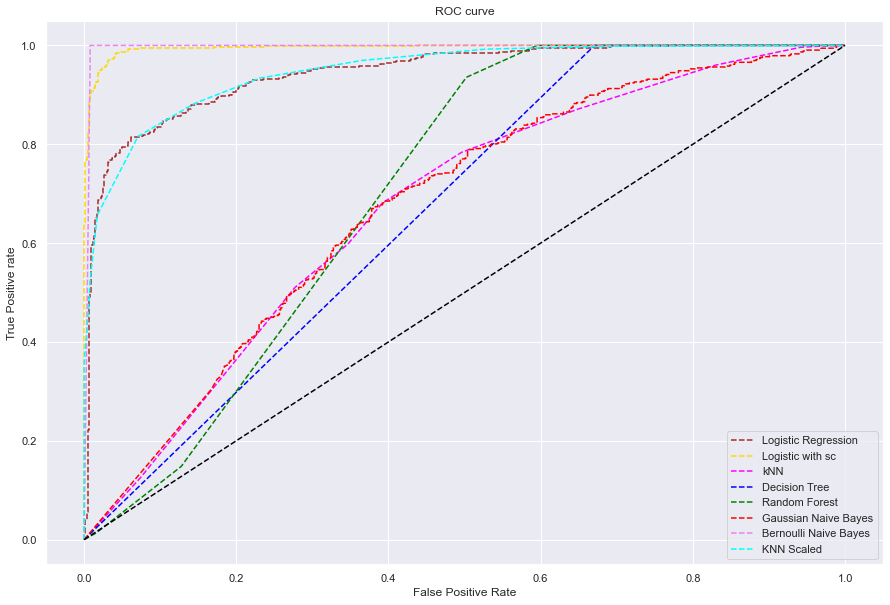

<Figure size 1080x720 with 0 Axes>

In [145]:
plt.plot(fpr1, tpr1, linestyle='--',color='brown', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='gold', label='Logistic with sc')
plt.plot(fpr3, tpr3, linestyle='--',color='magenta', label='kNN')
plt.plot(fpr4, tpr4, linestyle='--',color='blue', label='Decision Tree')
plt.plot(fpr5, tpr5, linestyle='--',color='green', label='Random Forest')
plt.plot(fpr6, tpr6, linestyle='--',color='red', label='Gaussian Naive Bayes')
plt.plot(fpr7, tpr7, linestyle='--',color='violet', label='Bernoulli Naive Bayes')
plt.plot(fpr8, tpr8, linestyle='--',color='cyan', label='KNN Scaled')



plt.plot(p_fpr, p_tpr, linestyle='--', color='black')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show();
plt.savefig('Multiclass ROC',dpi=1000); 
plt.show()